# Cleaning Dataset

## 1. Importing and exploring the dataset

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

In [47]:
%matplotlib inline
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

In [48]:
diamonds = pd.read_csv("Data/train.csv")
diam_test = pd.read_csv("Data/test.csv")
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422


In [49]:
diamonds.shape

(40455, 11)

In [50]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [51]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [52]:
diamonds.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## 2. Evaluating Collinearity

<AxesSubplot:>

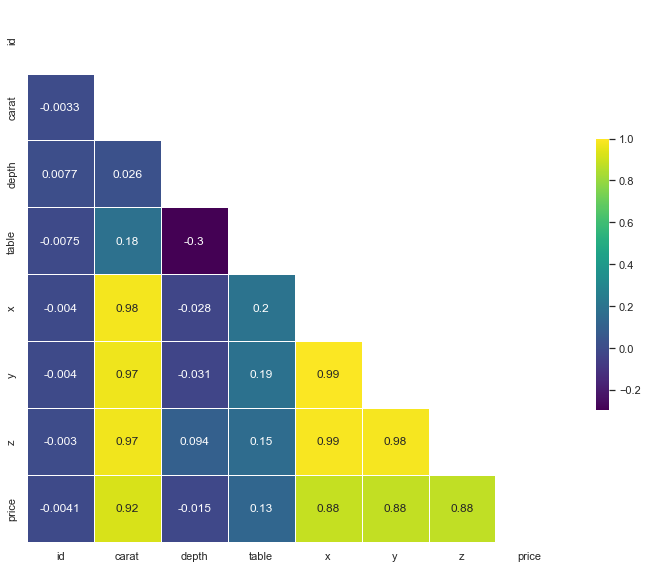

In [53]:
corr = diamonds.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
            )

In [54]:
diamonds.drop(columns=["x","y","z"], inplace=True)

In [55]:
diam_test.drop(columns=["x","y","z"], inplace=True)

<AxesSubplot:>

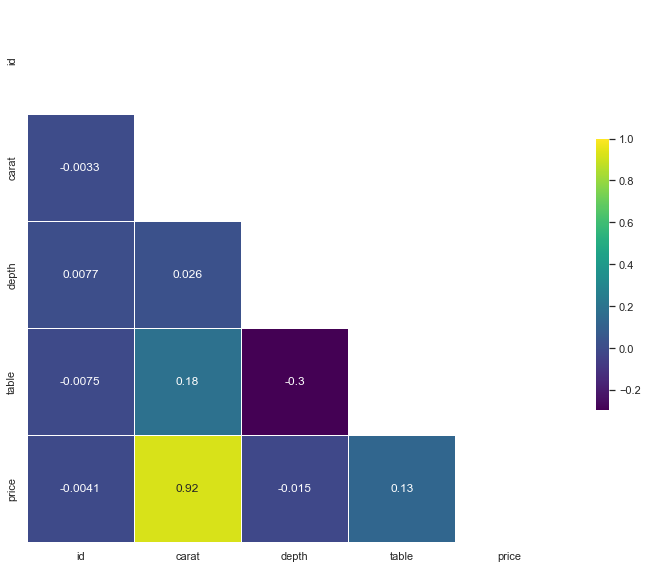

In [56]:
corr = diamonds.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
            )

In [57]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,422


## 3. Categorical Data to Ordinal

In [58]:
diamonds.cut.value_counts()

Ideal        16193
Premium      10301
Very Good     9030
Good          3710
Fair          1221
Name: cut, dtype: int64

In [59]:
diamonds.color.value_counts()

G    8459
E    7346
F    7174
H    6273
D    5019
I    4065
J    2119
Name: color, dtype: int64

In [60]:
diamonds.clarity.value_counts() 

SI1     9746
VS2     9175
SI2     6912
VS1     6137
VVS2    3822
VVS1    2732
IF      1367
I1       564
Name: clarity, dtype: int64

In [61]:
cut = {"Ideal": 2, "Premium": 1, "Very Good":3 , "Good":4, "Fair":5}
col = {"G":4, "E":2, "F":3, "H":5, "D":1, "I":6, "J":7}
clar = {"VVS2": 3, "VS2": 5, "VS1": 4, "SI2": 7, "SI1": 6, "VVS1": 2, "IF": 1 , "I1" : 8}

In [62]:
diamonds.cut = diamonds.cut.map(cut)
diamonds.color = diamonds.color.map(col)
diamonds.clarity = diamonds.clarity.map(clar)

In [63]:
diam_test.cut = diam_test.cut.map(cut)
diam_test.color = diam_test.color.map(col)
diam_test.clarity = diam_test.clarity.map(clar)

In [64]:
diamonds.shape

(40455, 8)

In [65]:
diam_test.shape

(13485, 7)

In [66]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.14,2,4,3,61.0,56.0,9013
1,1,0.76,2,5,5,62.7,57.0,2692
2,2,0.84,2,4,4,61.4,56.0,4372
3,3,1.55,2,5,4,62.0,57.0,13665
4,4,0.30,2,4,7,61.9,57.0,422


In [67]:
diam_test.head()

,id,carat,cut,color,clarity,depth,table
0,0,1.00,5,7,7,56.3,64.0
1,1,0.83,1,4,6,62.3,58.0
2,2,1.00,5,2,7,67.0,53.0
3,3,1.00,5,5,7,66.5,62.0
4,4,1.20,3,6,6,62.6,57.0


In [68]:
diamonds.to_csv("Data/train_clean.csv", index=False)

In [69]:
diam_test.to_csv("Data/test_clean.csv", index=False)